## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
# making data frame 
    
iris=pd.read_csv('iris.csv',header=0, sep='\,',engine='python')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Check dimension of data

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Check data Type

In [7]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Check for NaN/Null values
iris.isnull().values.any()

True

In [9]:
#no of missing values
iris.isnull().values.sum()

6

In [10]:
#LIST of missing values
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [11]:
# replacing missing values with median
iris.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [12]:
iris.fillna(iris.median(),inplace=True)

In [13]:
#Check if any missing values are there post replacement of null values with MEDIAN
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [14]:
#Dependent Variable
X=iris.iloc[:,0:5]

In [15]:
y=iris['Species']

In [16]:
#Check the dataset
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

In [17]:
#Check the dataset
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5           1.40           0.2
1      2            4.9           3.0           1.40           0.2
2      3            4.7           3.2           1.30           0.2
3      4            4.6           3.1           1.50           0.2
4      5            5.0           3.6           1.40           0.2
5      6            5.4           3.9           1.70           0.4
6      7            4.6           3.4           1.40           0.3
7      8            5.0           3.4           1.50           0.2
8      9            4.4           2.9           1.40           0.2
9     10            4.9           3.1           1.50           0.1
10    11            5.4           3.7           1.50           0.2
11    12            4.8           3.4           1.60           0.2
12    13            4.8           3.0           1.40           0.1
13    14            4.3           3.0           1.10          

### Find the distribution of target variable (Class) (1 Marks)

In [18]:
import seaborn as sns; 
import matplotlib.pylab as plt
plt.style.use('classic')

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDFAE14EF0>,
      dtype=object)

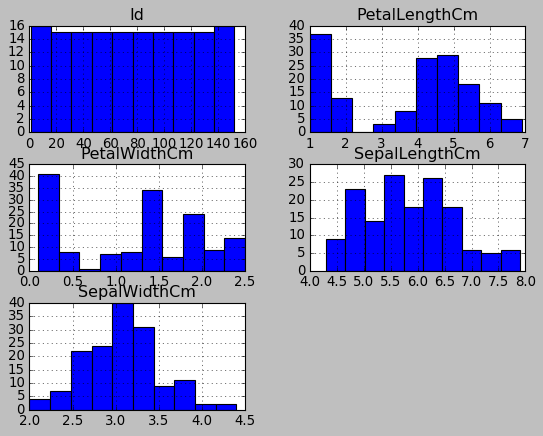

In [19]:
#Plot Data
X.hist()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

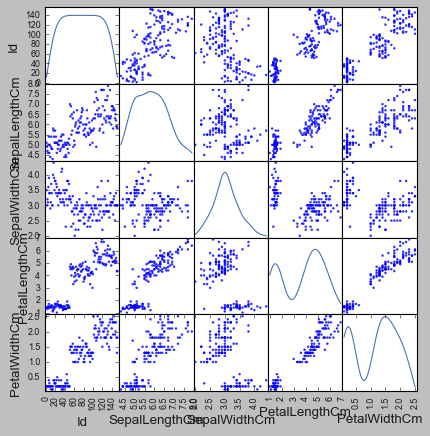

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.8, figsize=(6, 6), diagonal='kde')
sns.set(font_scale=5)

C:\Users\P V Rao\New folder\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'PairGrid'

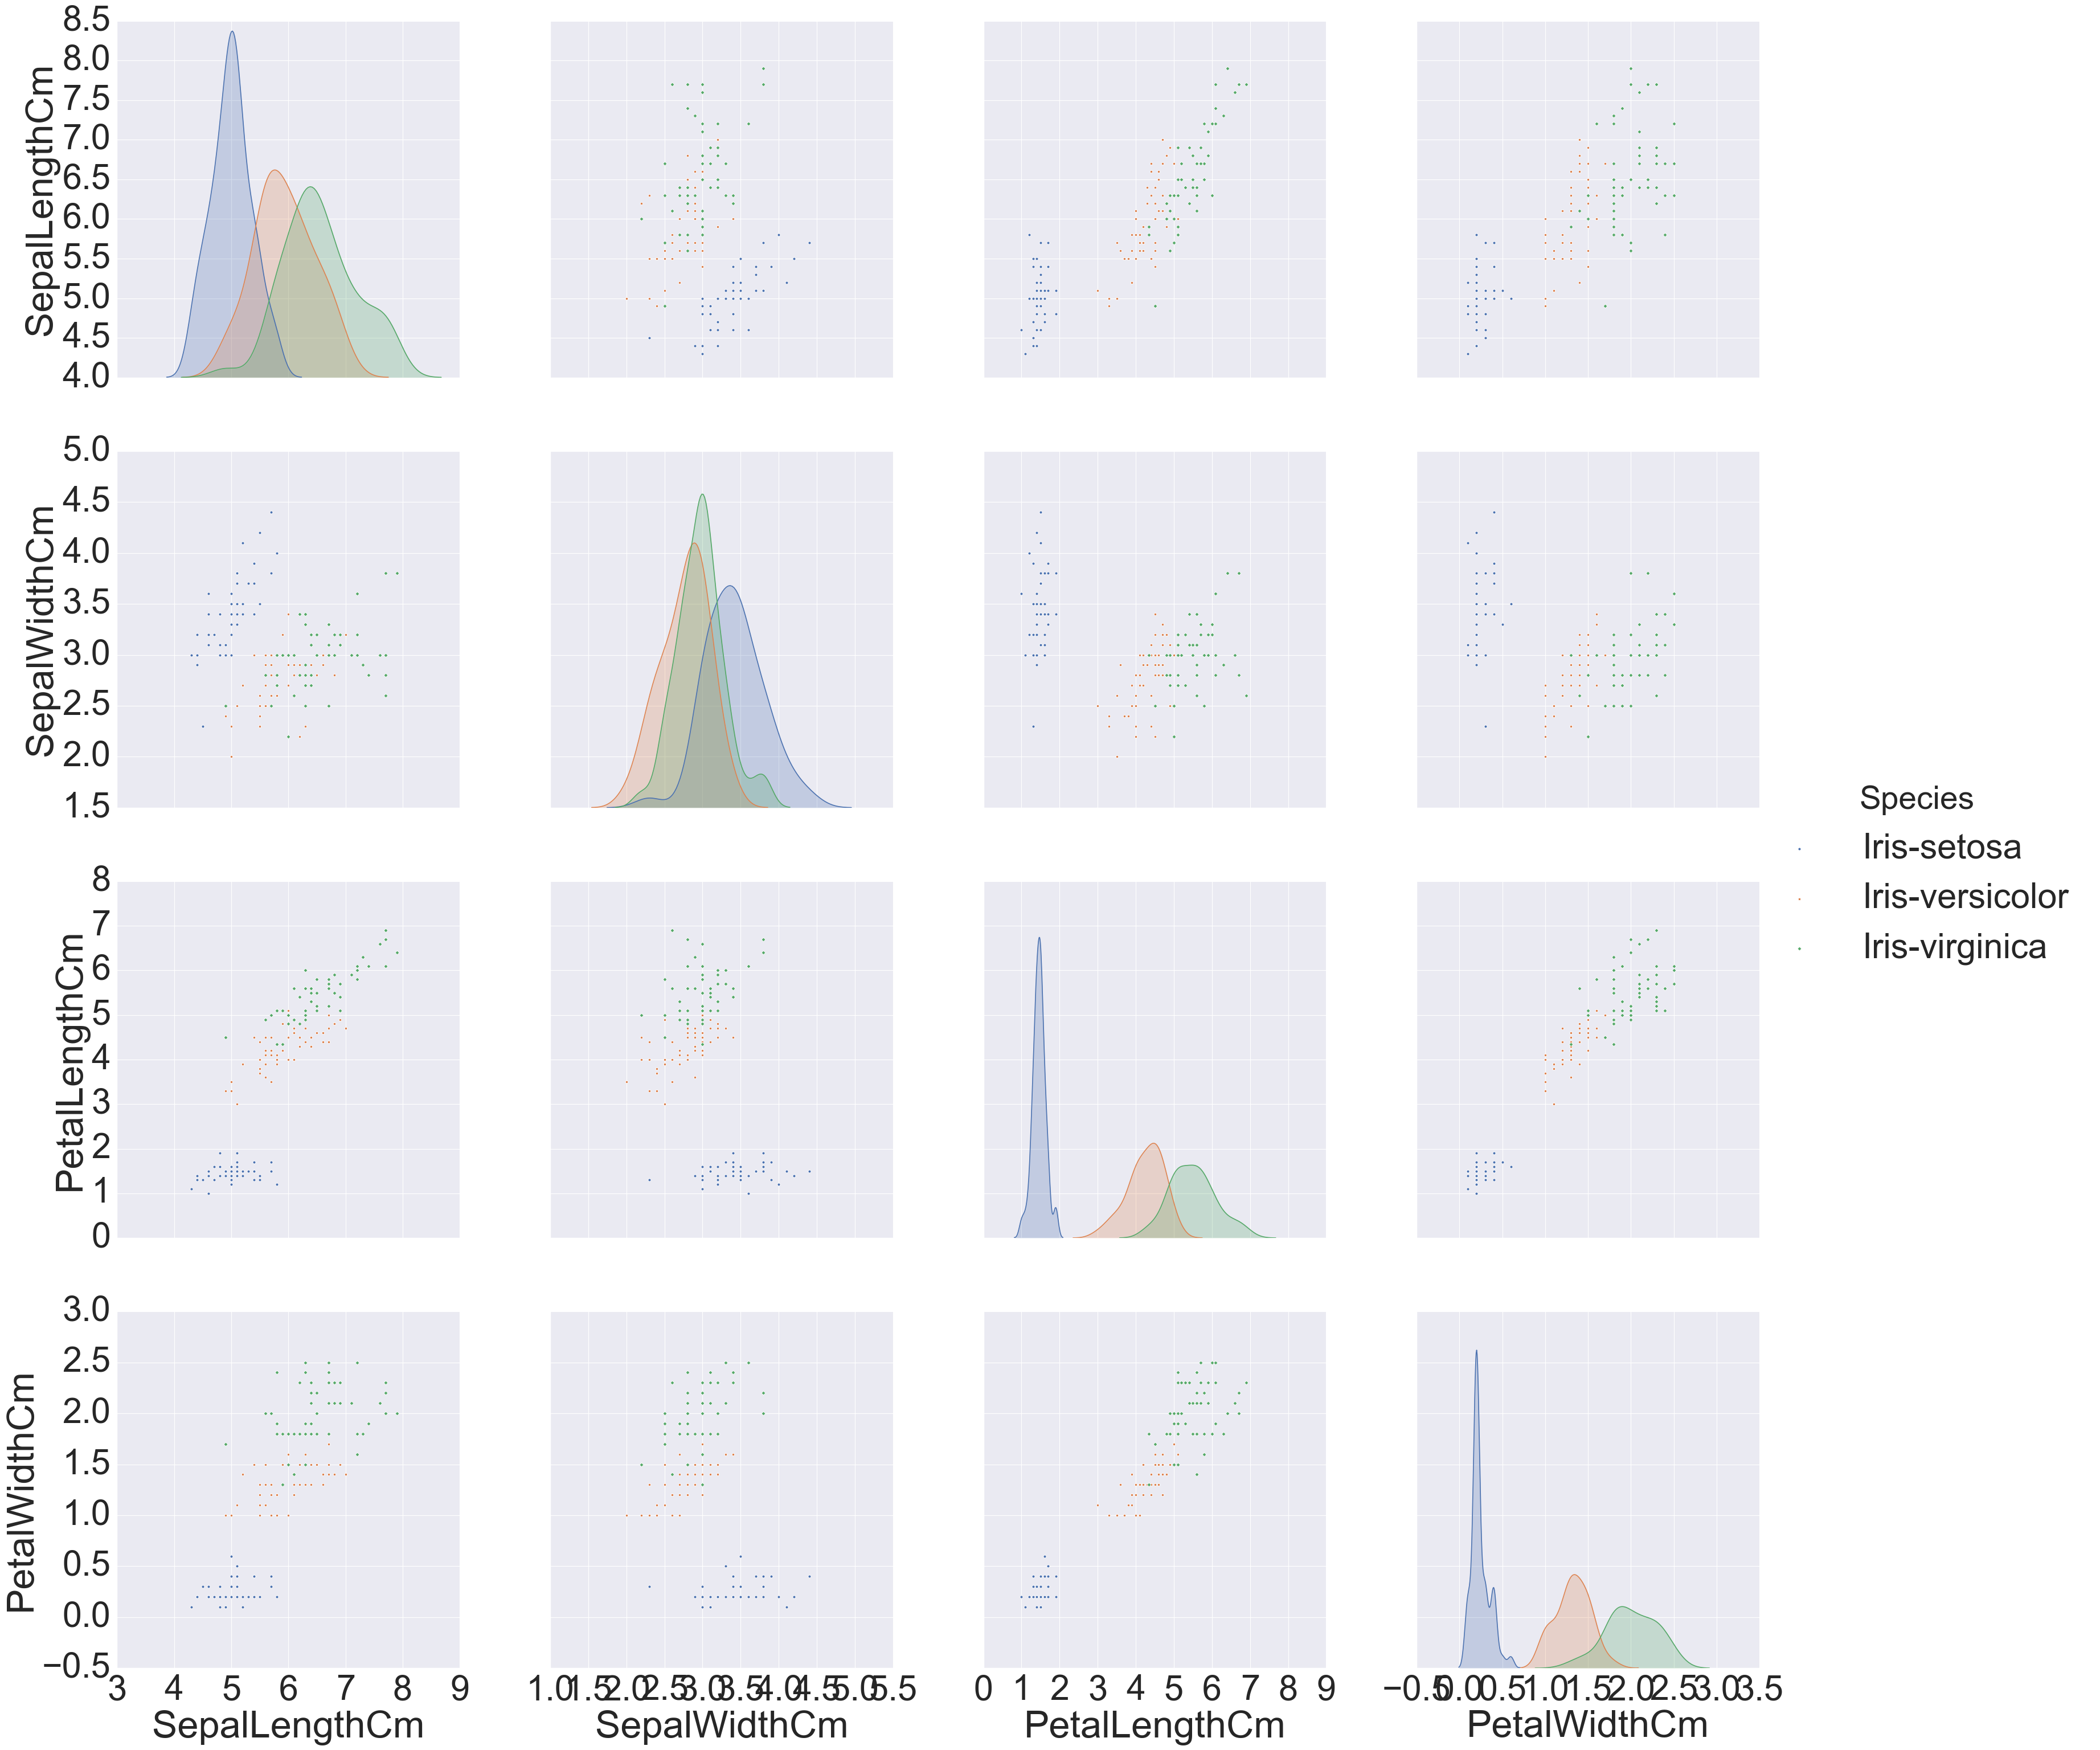

In [21]:
import seaborn as sns
plt.figure(sns.pairplot(iris.drop("Id", axis=1), hue = "Species", size=10, markers=["o", "s", "D"]))
plt.show()

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

The above diagram depicts correlation of below variable sets:
    Sepal Length n Petal Length
    Sepal Length n Petal Width
    Petal Length n Petal Width (with some gap)
   Note: ID is not considered as it is mere count of records 
         #Drop Id variable from data

Correlation among all variables and give your insights (1 Marks)

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [22]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.702734,-0.392693,0.872346,0.890676
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000


In [23]:
iris1=iris.drop(columns=["Id",'Species'])
iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris1.shape

(152, 4)

In [25]:
#dropped ID, Species column
iris1 =iris1.corr().abs()

In [26]:
# Select upper triangle of correlation matrix
upper = iris1.where(np.triu(np.ones(iris1.shape), k=1).astype(np.bool))
iris1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.109369,0.871120,0.815986
SepalWidthCm,0.109369,1.000000,0.420713,0.356510
PetalLengthCm,0.871120,0.420713,1.000000,0.962043
PetalWidthCm,0.815986,0.356510,0.962043,1.000000


In [27]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.96)]

In [28]:
iris1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [29]:
iris1.shape

(4, 4)

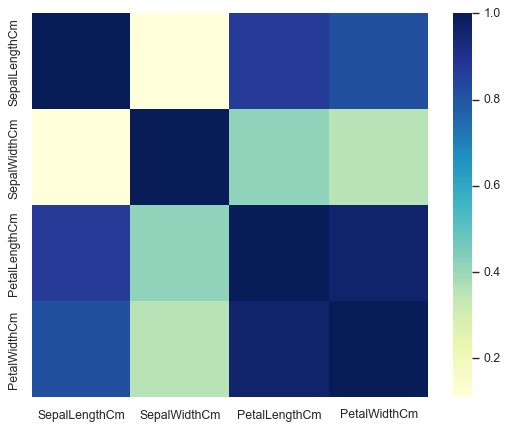

In [32]:
heat_map = sns.heatmap(iris1, cmap="YlGnBu")
sns.set(font_scale=1)
plt.show()

### Split data in Training and Validation in 80:20 (1 Marks)

In [33]:
# SPLITTING INTO TRAINING AND TEST SET

In [34]:
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(121, 5) (121,)
(31, 5) (31,)


In [35]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### Do Feature Scaling ( 1 Marks)

In [36]:
# Use StandardScaler or similar methods
# using StandardScaler method

In [37]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\P V Rao\New folder\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\P V Rao\New folder\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\P V Rao\New folder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Train and Fit NaiveBayes Model(2 Marks)

In [39]:
#Fit the model

In [40]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
#Predict

In [42]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [43]:
# show Confusion Matrix

In [51]:
model=GaussianNB()
model.fit(X,y)
expected=y
predicted=model.predict(X)

In [52]:
from sklearn import metrics
print('confusion_matrix:',metrics.confusion_matrix(expected,predicted))

confusion_matrix: [[50  0  0]
 [ 0 50  0]
 [ 0  1 51]]


In [46]:
# show accuracy

In [53]:
print('accuracy_score:',metrics.accuracy_score(expected,predicted))

accuracy_score: 0.993421052631579


In [48]:
#Show precision and Recall metrics

In [54]:
print('classification_report:',metrics.classification_report(expected,predicted))

classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      1.00      0.99        50
 Iris-virginica       1.00      0.98      0.99        52

      micro avg       0.99      0.99      0.99       152
      macro avg       0.99      0.99      0.99       152
   weighted avg       0.99      0.99      0.99       152



## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [ ]:
# making data frame 
    
iris=pd.read_csv('iris.csv',header=0, sep='\,',engine='python')
iris.head(10)

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [ ]:
# Check for NaN/Null values
iris.isnull().values.any(), iris.isnull().values.sum()

In [ ]:
iris.fillna(iris.median(),inplace=True)

In [ ]:
iris.head()

In [ ]:
#Check if any missing values are there post replacement of null values with MEDIAN
iris.isnull().sum()

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [ ]:
 #assumming class is referred for Species

In [ ]:
# class/species distribution
print(iris.groupby('Species').size())

In [ ]:
## Alternate approach for count/proporation -  Target Variable Frequency Distribution
freq = iris['Species'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

In [ ]:
#Change all the Species to numericals (0to2)

In [ ]:
iris.dtypes

In [ ]:
iris.head()

In [ ]:
#iris['Species'].astype(int). this code not sure why it is not working
iris.replace({'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}, inplace=True)
iris.dtypes

In [ ]:
Species = {'Iris-virginica': 0,'Iris-setosa':1,'Iris-versicolor': 2} 
iris.head()

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [ ]:
#Dependent Variable
X=iris.iloc[:,0]
y=['Species']

In [ ]:
corr_matrix = iris.corr()
print(corr_matrix["Species"].sort_values(ascending=False))

In [ ]:
corr_matrix = iris.corr(method='pearson')['Species'].abs()

for col in corr_matrix.index :
    if corr_matrix[col] < 0.1:
        iris.drop(col, axis=1, inplace=True)
        
iris.shape

In [ ]:
iris.info()

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [ ]:
iris.var()
# no action needed as values are greater than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

In [ ]:
plt.scatter(iris['SepalLengthCm'], iris['PetalLengthCm'])

In [ ]:
plt.scatter(iris['SepalWidthCm'], iris['PetalWidthCm'])

In [ ]:
plt.scatter(iris['SepalWidthCm'], iris['SepalLengthCm'])

In [ ]:
plt.scatter(iris['PetalWidthCm'], iris['PetalLengthCm'])

In [ ]:
sns.pairplot(iris,diag_kind='ide')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [ ]:
iris.drop("Id", axis=1, inplace=True)
iris.head()

In [ ]:
iris_Xy = iris.values
X = iris_Xy[:, 0:4]
y = iris_Xy[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X.shape,y

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [ ]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [ ]:
def knn_model(n_neighbours):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score with k={} is {} ".format(n_neighbours, accuracy))
    cross_val = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    print("Cross Validation Score:", cross_val)
    print(metrics.confusion_matrix(y_test, y_pred))

knn_model(3)

In [ ]:
knn_model(5)

In [ ]:
knn_model(9)

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [ ]:
def knn_model(n_neighbours):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score with k={} is {} ".format(n_neighbours, accuracy))
    cross_val = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    print("Cross Validation Score:", cross_val)
    print(metrics.confusion_matrix(y_test, y_pred))

knn_model(3)

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [ ]:
# Above method prints the confusion matrix plotting from the results.
plt.bar([3, 5, 9], [2,1,1])